In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV


plt.style.use('Solarize_Light2') 
pd.options.display.max_columns = 30

# Read in the Data

In [2]:
df = pd.read_csv('../Churn-Customer-Classification/input/BankChurners.csv')

In [3]:
df.shape

(10127, 23)

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [6]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [8]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [9]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

#### No null data to worry about. However, we do have columns that aren't intuitive for our analysis

In [10]:
df = df[['Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

In [11]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [12]:
for col in df.select_dtypes(['object']).columns:
    print(col)
    print(df[col].value_counts(), '\n')

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64 

Gender
F    5358
M    4769
Name: Gender, dtype: int64 

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64 

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64 

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64 

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64 



In [13]:
continuous = []
for col in df.select_dtypes(['int64', 'float64']).columns:
    continuous.append(col)

In [14]:
df.describe()[continuous]

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## Define churn rate 
"The churn rate formula is: (Lost Customers ÷ Total Customers at the Start of Time Period) x 100." 
-- https://blog.hubspot.com/service/what-is-churn-rate

In our case the formula will be 

Attrited Customer / Attrited + Existing Customer * 100

In [15]:
churn_percentage = 100 *(df['Attrition_Flag'].value_counts()[1] / (df['Attrition_Flag'].value_counts()[0]+
                          df['Attrition_Flag'].value_counts()[1]))
churn_percentage = np.round(churn_percentage, 1)

In [16]:
#The churn percentage for this dataset is 
churn_percentage

16.1

# EDA 

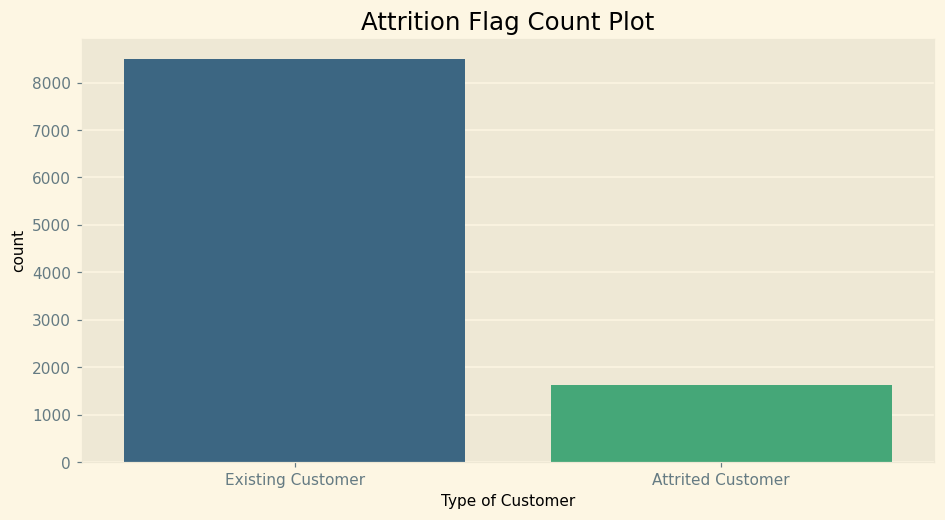

In [17]:
plt.figure(figsize=(10, 5), dpi=110)
plt.title("Attrition Flag Count Plot")
sns.countplot(df, x='Attrition_Flag', palette='viridis');
plt.xlabel('Type of Customer');

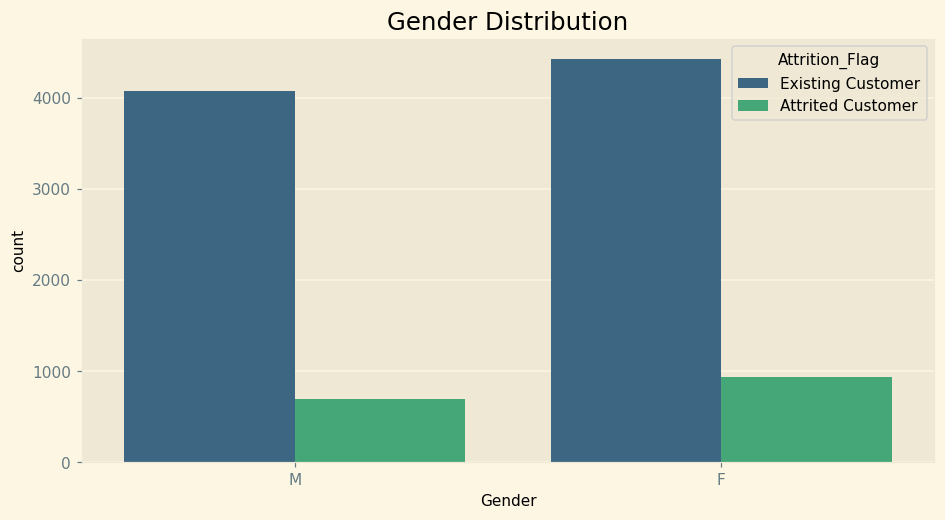

In [18]:
plt.figure(figsize=(10,5), dpi=110)
plt.title("Gender Distribution")
sns.countplot(df, x='Gender', hue='Attrition_Flag', palette='viridis');

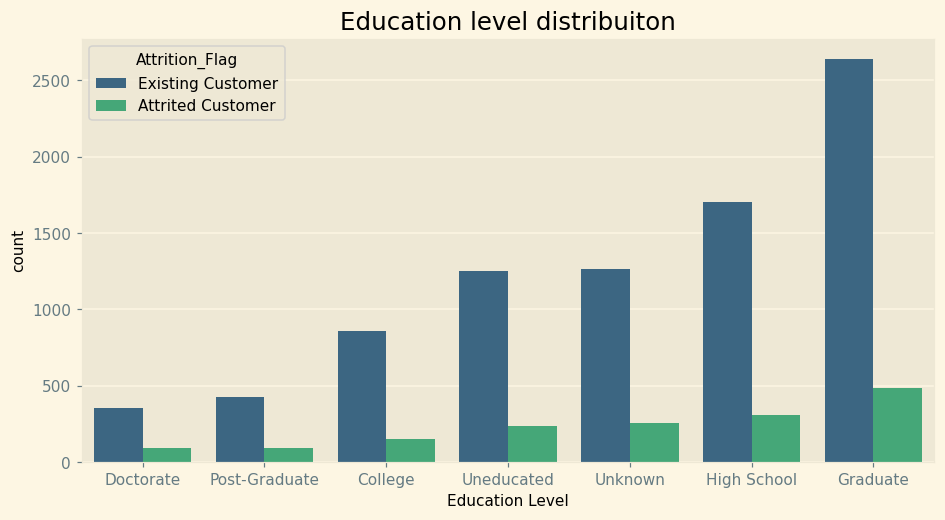

In [19]:
plt.figure(figsize=(10, 5), dpi = 110)
plt.title("Education level distribuiton")
sns.countplot(df,x='Education_Level',hue='Attrition_Flag', palette='viridis', order= df['Education_Level'].value_counts(ascending=True).index)
plt.xlabel('Education Level');

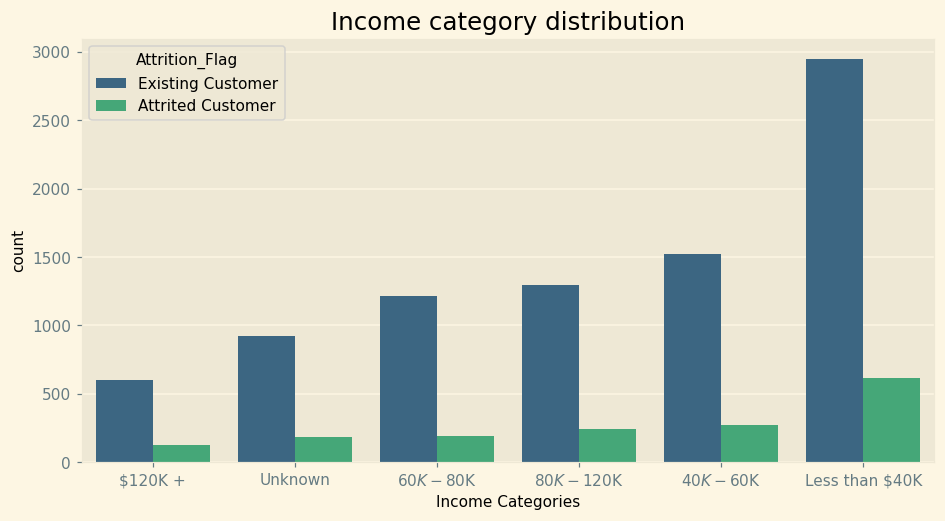

In [20]:
plt.figure(figsize=(10, 5), dpi=110)
plt.title("Income category distribution")
sns.countplot(df,x='Income_Category', hue='Attrition_Flag', palette='viridis', order= df['Income_Category'].value_counts(ascending=True).index);
plt.xlabel('Income Categories');

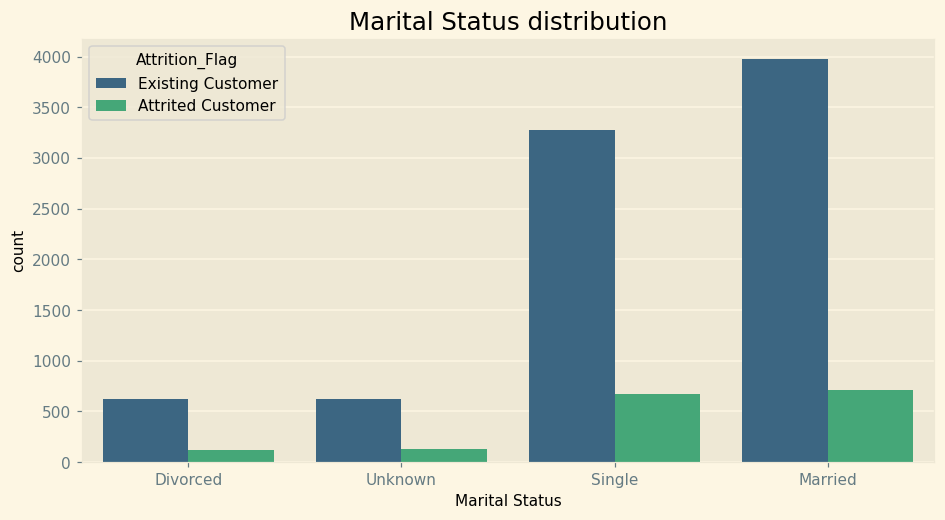

In [21]:
plt.figure(figsize=(10, 5), dpi=110)
plt.title("Marital Status distribution")
sns.countplot(df,x='Marital_Status', hue='Attrition_Flag', palette='viridis', order= df['Marital_Status'].value_counts(ascending=True).index);
plt.xlabel('Marital Status');

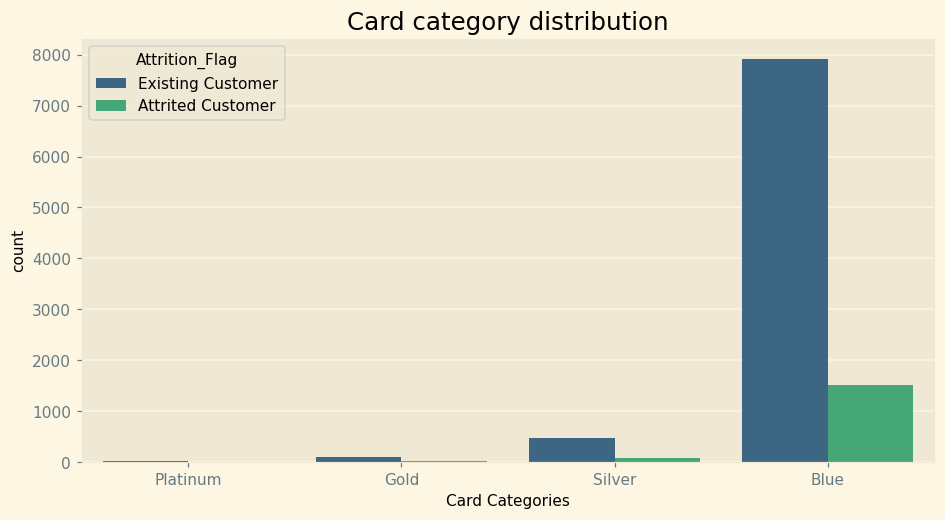

In [22]:
plt.figure(figsize=(10, 5), dpi=110)
plt.title("Card category distribution")
sns.countplot(df,x='Card_Category', hue='Attrition_Flag', palette='viridis', order= df['Card_Category'].value_counts(ascending=True).index);
plt.xlabel('Card Categories');

##### From the above categorical plots, we have the following observations:
   - Attrited Accounts are much lower than Existing. As mentioned, they account for less than 20 percent customers
   - Attrition is high in blue card category
   - Similar rates regardless of being single or married
   - Higher attrition rate in less than 40k income category
   - education level doesn't seem to have much affect between high school and graduates. 
   - Sort of higher attrition rate in female but nearly the same

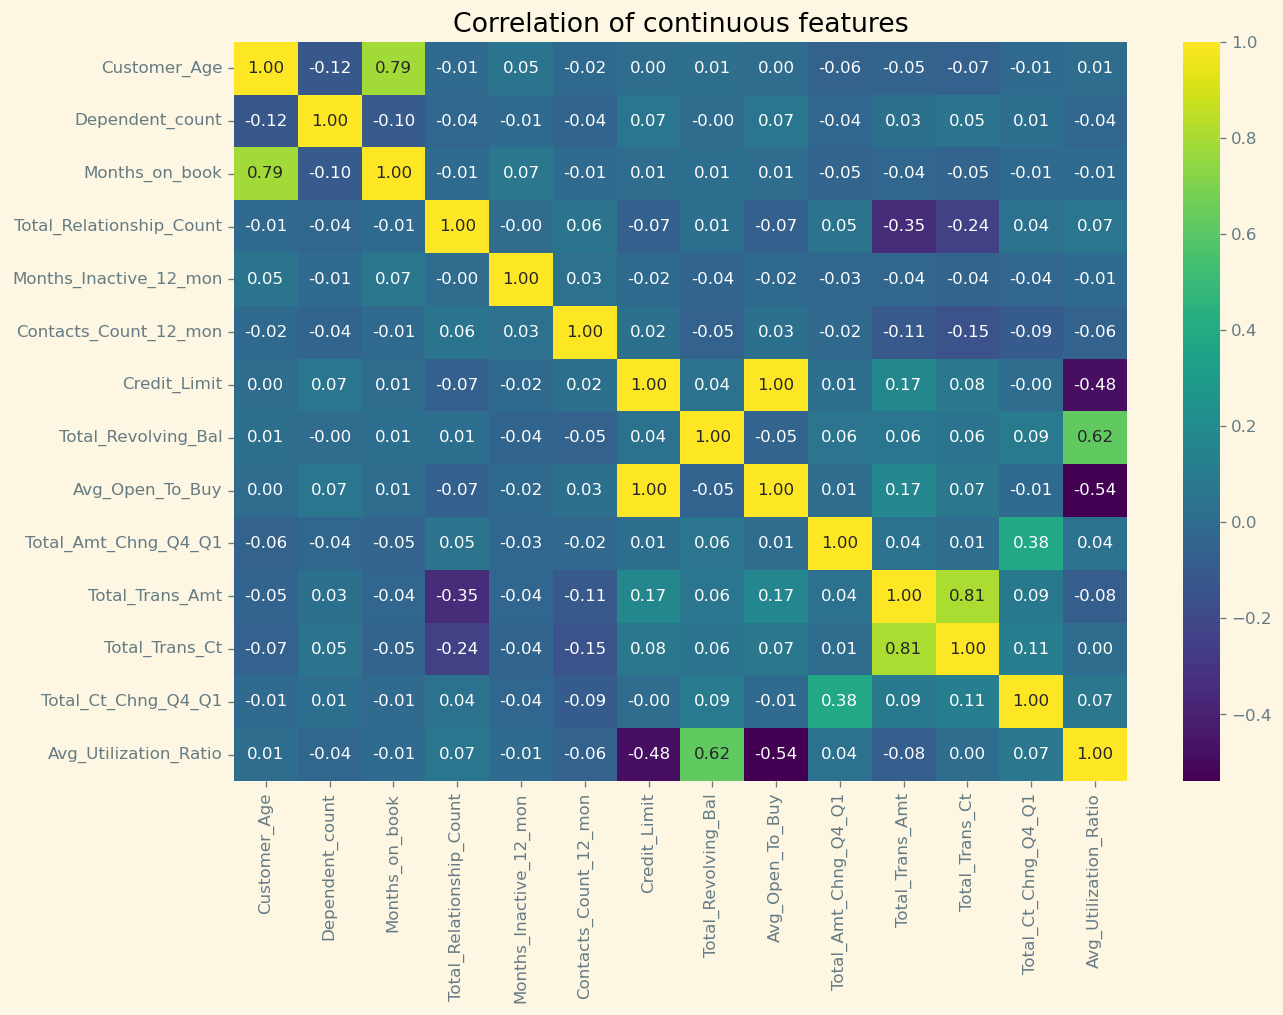

In [23]:
plt.figure(figsize=(12,8), dpi= 120)
plt.title("Correlation of continuous features")
sns.heatmap(df[continuous].corr(), cmap='viridis', annot=True, fmt='.2f');

##### From the heatmap we can observe some correlations:
     - Customer Age and Months on book have a positive correlation
     - Credit Limit and Avg_Open_To_Buy are highly correlated 
     - Total_Revolving_Bal and Avg_Utilization_Rate are positively related
     - Total_Trans_Amt and Total_Trans_Ct also have a positive correlation
     

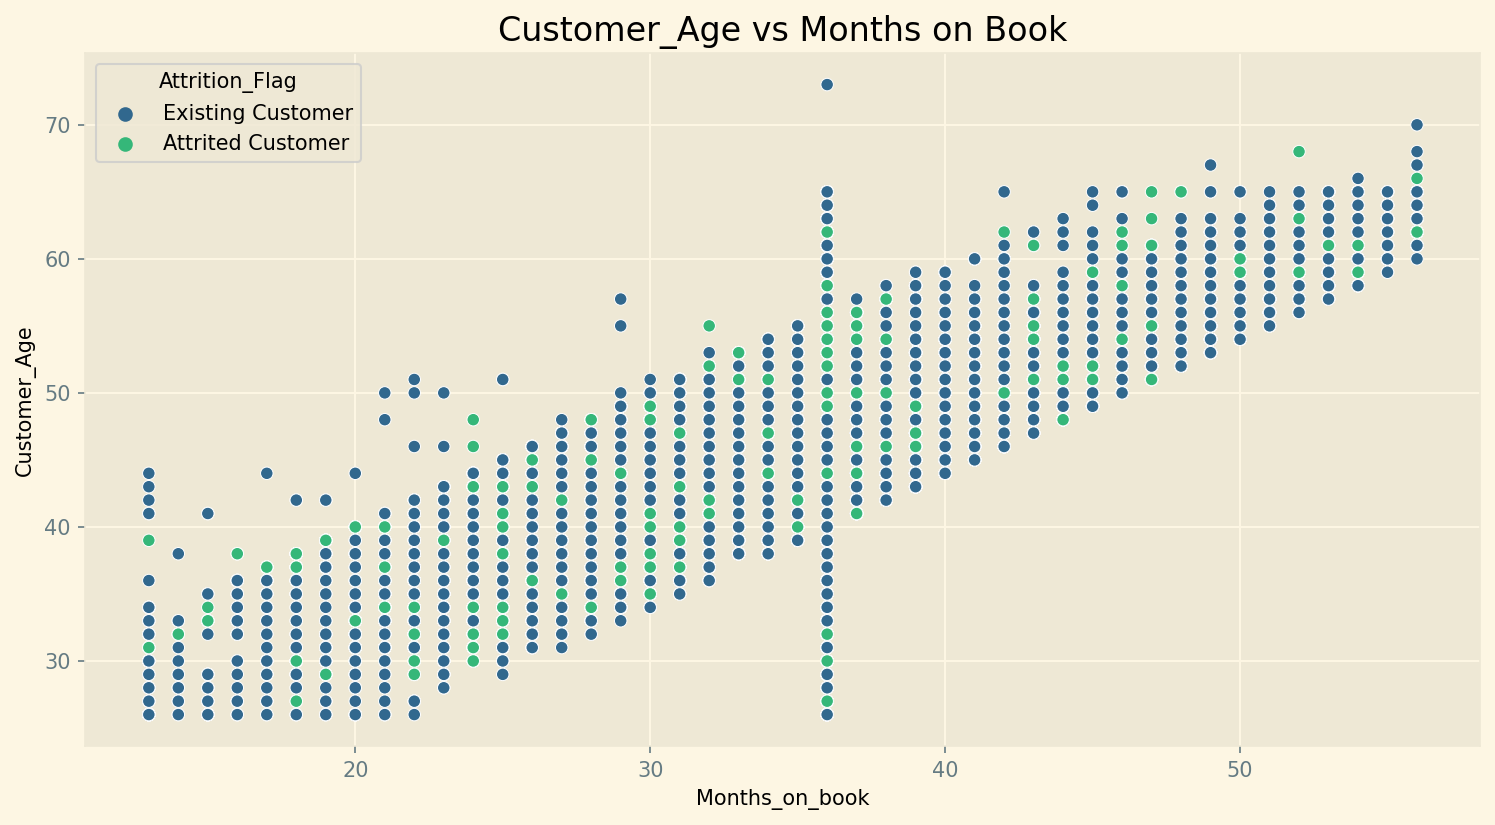

In [24]:
plt.figure(figsize=(12,6), dpi=150)
sns.scatterplot(df, y='Customer_Age', x='Months_on_book', hue='Attrition_Flag', palette='viridis')
plt.title('Customer_Age vs Months on Book');


Unlikely to find any insighits by applying Attirtion_Flag as hue

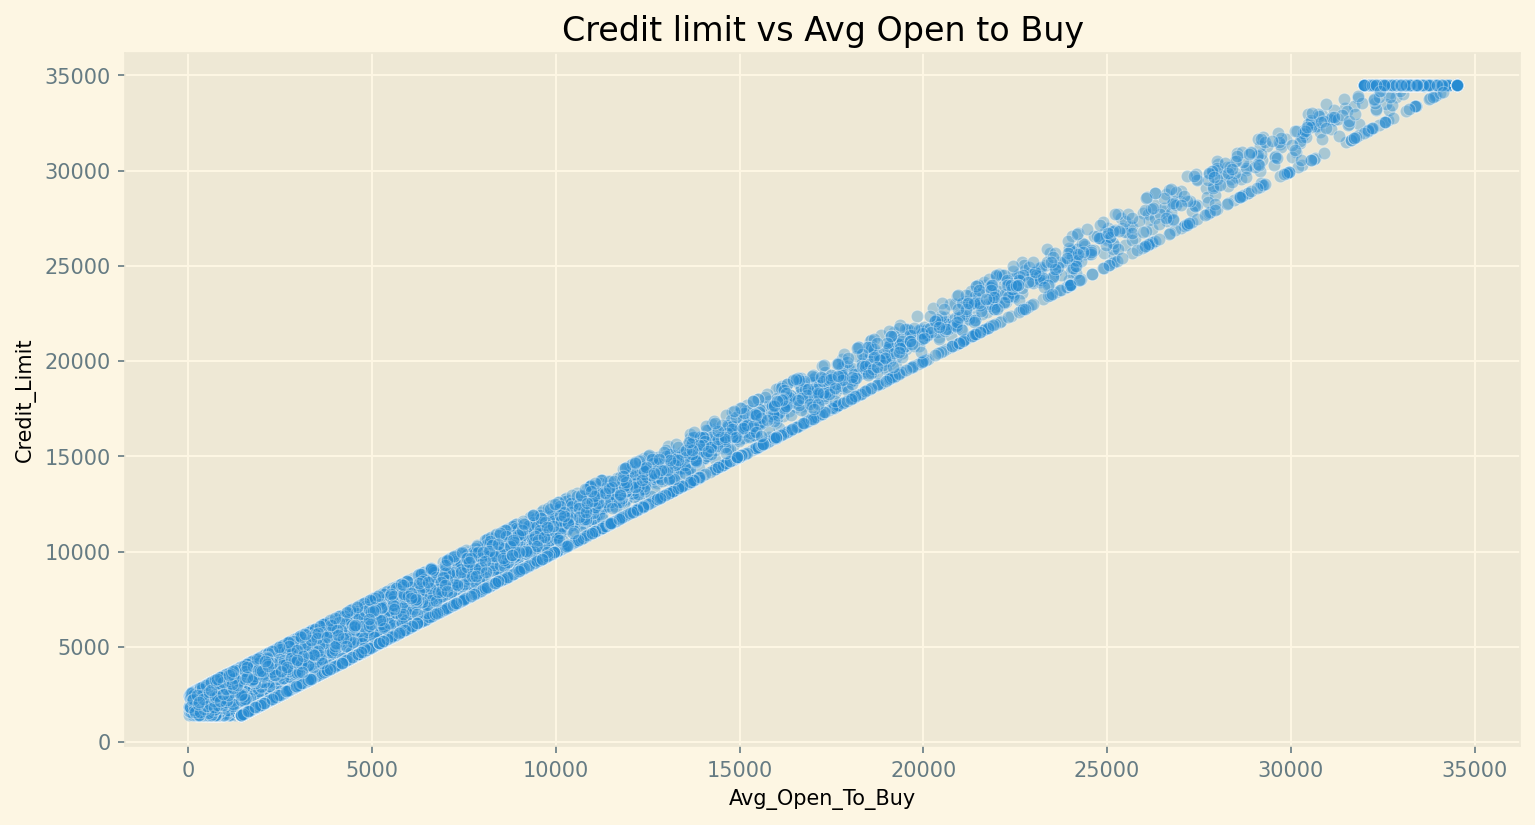

In [25]:
plt.figure(figsize=(12,6), dpi=150)
sns.scatterplot(df, y='Credit_Limit', x='Avg_Open_To_Buy', alpha=0.35)
plt.title('Credit limit vs Avg Open to Buy');

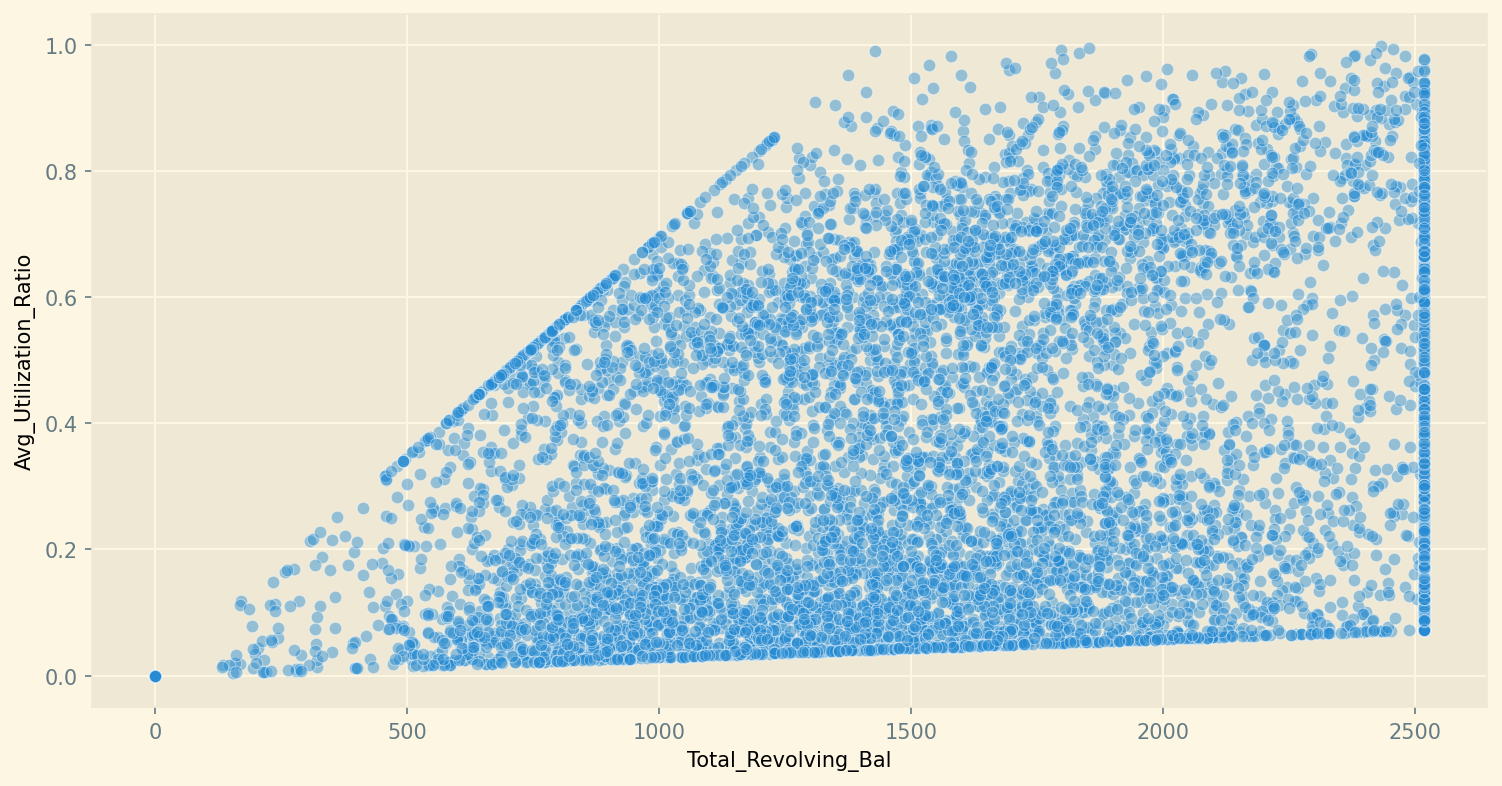

In [26]:
plt.figure(figsize=(12,6), dpi=150)
sns.scatterplot(df, x='Total_Revolving_Bal', y='Avg_Utilization_Ratio',alpha=0.45);

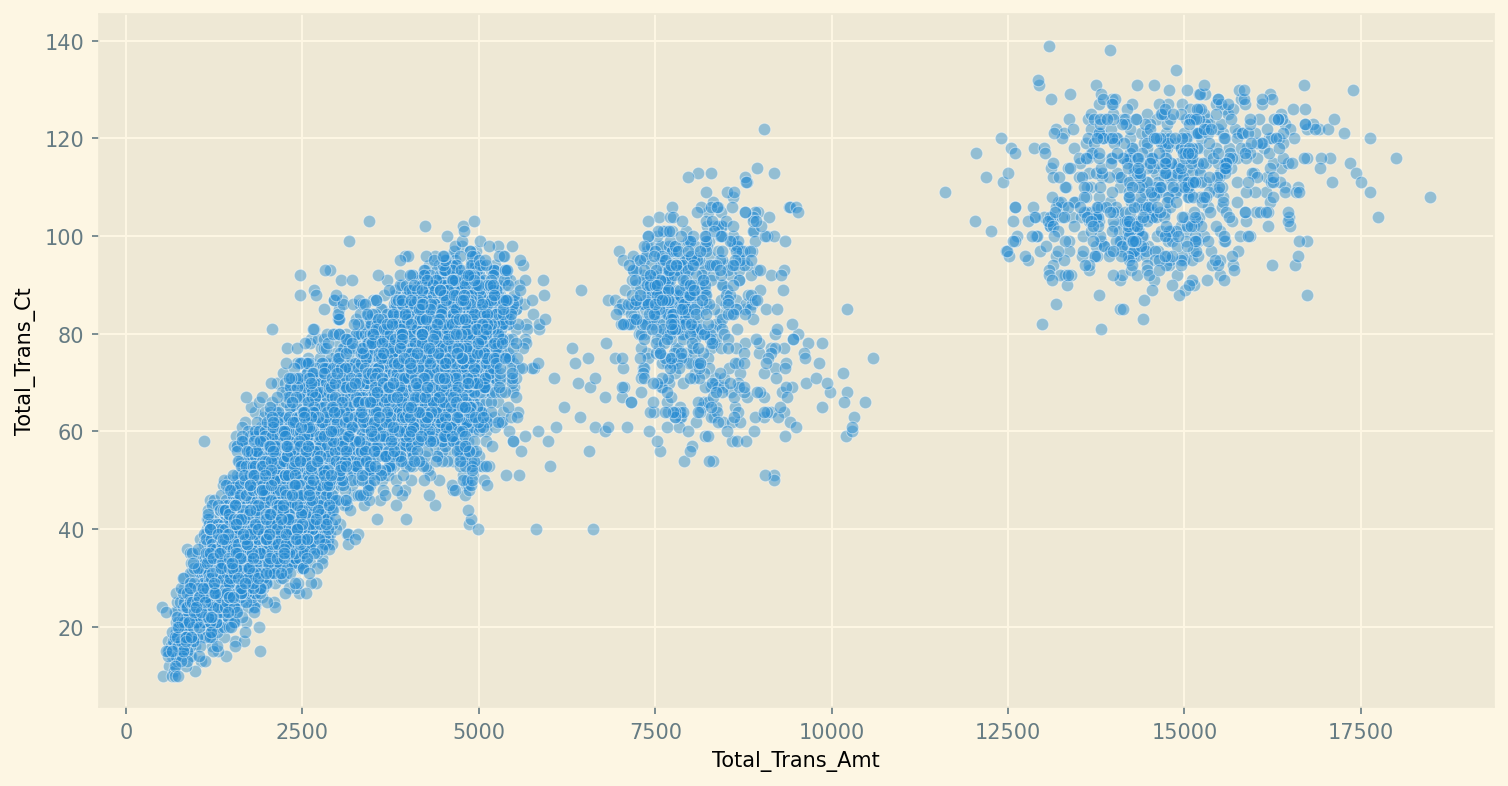

In [27]:
plt.figure(figsize=(12,6), dpi=150)
sns.scatterplot(df, x='Total_Trans_Amt', y='Total_Trans_Ct',alpha=0.45);

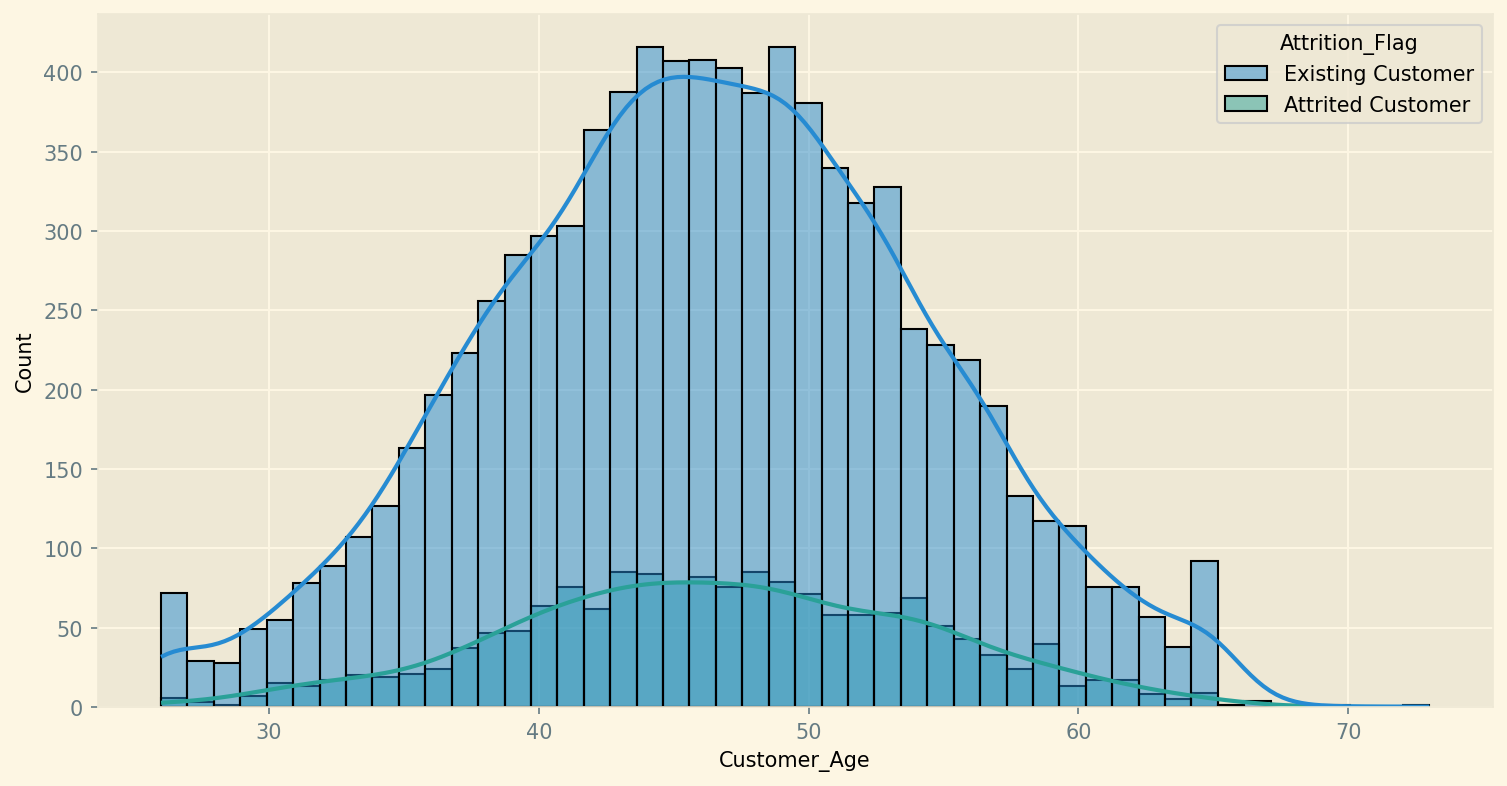

In [28]:
plt.figure(figsize=(12,6), dpi=150)
sns.histplot(df, x='Customer_Age', hue='Attrition_Flag', bins=48, kde=True);

### Pre Processing

In [29]:
df_ohe = pd.DataFrame()

In [30]:
continuous_feat = ['Customer_Age','Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
             'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
             'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

df_ohe['Gender'] = df['Gender'].map({'M' : 1, 'F': 0})
df_ohe['Attrition'] = df['Attrition_Flag'].map({"Attrited Customer":1, "Existing Customer":0})
df_ohe['Education'] = df['Education_Level'].map({'Uneducated':0, 'High School':1, 'College':2, 'Graduate':3, 'Post-Graduate':4, 'Doctorate':5, 'Unknown':6})
df_ohe['Income'] = df['Income_Category'].map({'Less than $40K':0, '$40K - $60K':1, '$60K - $80K':2, '$80K - $120K':3, '$120K +':4, 'Unknown':5})
df_ohe['Card'] = df['Card_Category'].map({'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3})

marital_df = pd.get_dummies(df['Marital_Status'], prefix='marital', drop_first=True)

df_ohe = pd.concat([df_ohe, marital_df, df[continuous_feat]], axis=1)

In [31]:
df_ohe.head()

,Gender,Attrition,Education,Income,Card,marital_Married,marital_Single,marital_Unknown,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,0,1,2,0,1,0,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,0,3,0,0,0,1,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,0,3,3,0,1,0,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,0,1,0,0,0,0,1,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,0,0,2,0,1,0,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [32]:
df_ohe.shape

(10127, 22)

In [33]:
X = df_ohe.drop('Attrition', axis=1)
y= df_ohe['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### PCA

perform PCA to get the best components 

In [34]:
pca = PCA()
pca.fit(scaled_X_train)

PCA()

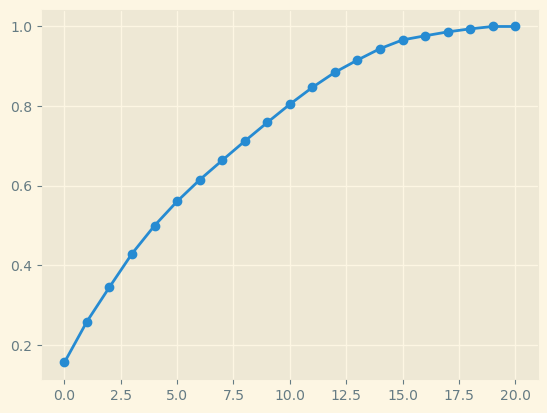

In [35]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o');

##### We can observe that there is not much of a variance after 10

    Choose a value between 10 - 15

In [36]:
# Code adapted from: https://www.kaggle.com/code/rebeccapringle/bank-churners-96-6-accuracy#Pre-Processing\

def get_best_features(model, feature_names):
    model.fit(X,y)
    importances = model.feature_importances_

    indices = np.argsort(importances)
    best_features = np.array(feature_names)[indices][-12:]
    
    return best_features

In [37]:
feature_names = X.columns
rtree = RandomForestClassifier()
best_feat = get_best_features(rtree, feature_names)

In [38]:
best_feat

array(['Months_on_book', 'Contacts_Count_12_mon', 'Avg_Open_To_Buy',
       'Credit_Limit', 'Customer_Age', 'Avg_Utilization_Ratio',
       'Total_Relationship_Count', 'Total_Amt_Chng_Q4_Q1',
       'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Total_Trans_Ct',
       'Total_Trans_Amt'], dtype=object)

In [39]:
df_comp = df_ohe[['Attrition', 'Months_on_book', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Avg_Open_To_Buy', 'Customer_Age', 'Avg_Utilization_Ratio',
       'Total_Relationship_Count', 'Total_Amt_Chng_Q4_Q1',
       'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Ct',
       'Total_Trans_Amt']]

In [40]:
df_comp.head()

,Attrition,Months_on_book,Contacts_Count_12_mon,Credit_Limit,Avg_Open_To_Buy,Customer_Age,Avg_Utilization_Ratio,Total_Relationship_Count,Total_Amt_Chng_Q4_Q1,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct,Total_Trans_Amt
0,0,39,3,12691.0,11914.0,45,0.061,5,1.335,777,1.625,42,1144
1,0,44,2,8256.0,7392.0,49,0.105,6,1.541,864,3.714,33,1291
2,0,36,0,3418.0,3418.0,51,0.000,4,2.594,0,2.333,20,1887
3,0,34,1,3313.0,796.0,40,0.760,3,1.405,2517,2.333,20,1171
4,0,21,0,4716.0,4716.0,40,0.000,5,2.175,0,2.500,28,816


In [41]:
X = df_comp.drop(['Attrition'], axis=1)
y= df_comp['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### KNN model

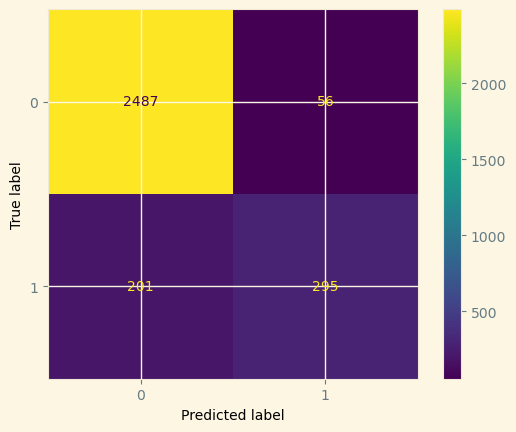

In [43]:
knn = KNeighborsClassifier()
knn.fit(scaled_X_train, y_train)
y_pred = knn.predict(scaled_X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2543
           1       0.84      0.59      0.70       496

    accuracy                           0.92      3039
   macro avg       0.88      0.79      0.82      3039
weighted avg       0.91      0.92      0.91      3039



In [45]:
# 92 percent accuracy, Poor recall and f1-score for 1 classification

### Use the RandomClassifier from earlier on the new scaled Data

In [46]:
rtree.fit(scaled_X_train, y_train)

RandomForestClassifier()

In [47]:
y_pred = rtree.predict(scaled_X_test)

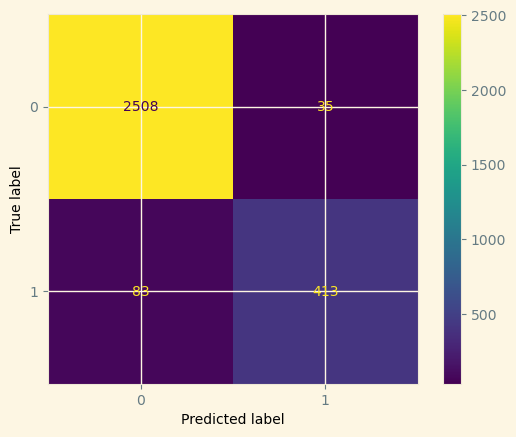

In [48]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2543
           1       0.92      0.83      0.88       496

    accuracy                           0.96      3039
   macro avg       0.94      0.91      0.93      3039
weighted avg       0.96      0.96      0.96      3039



In [50]:
#Improved results from KNN to RandomClassifier. Lets perform gridSearchcv

RandomForestClassifier()

RandomForestClassifier()

In [51]:
n_estimators = [500, 1000]
max_depth=[10, 15, 20]

param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth}

r_tree = RandomForestClassifier()
grid = GridSearchCV(r_tree, param_grid)

In [52]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 20],
                         'n_estimators': [500, 1000]})

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2543
           1       0.93      0.84      0.88       496

    accuracy                           0.96      3039
   macro avg       0.95      0.91      0.93      3039
weighted avg       0.96      0.96      0.96      3039



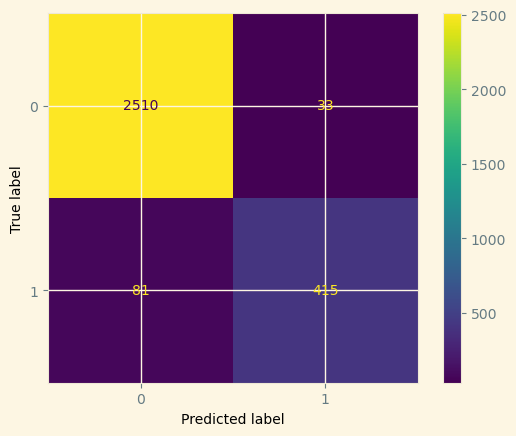

In [53]:
y_pred = grid.predict(scaled_X_test)

cm= confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2543
           1       0.92      0.84      0.88       496

    accuracy                           0.96      3039
   macro avg       0.95      0.91      0.93      3039
weighted avg       0.96      0.96      0.96      3039



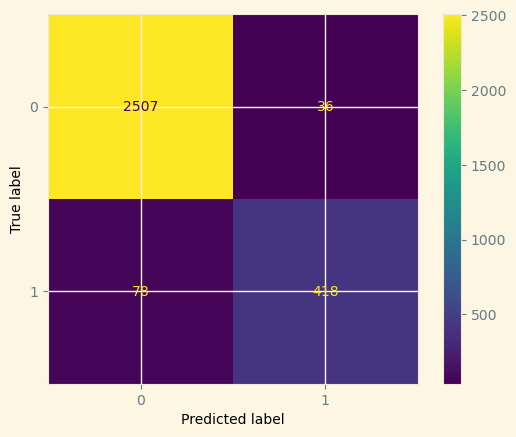

In [54]:
rfc = RandomForestClassifier(n_estimators = 1000, max_depth = 20)
rfc.fit(scaled_X_train, y_train)
y_pred = rfc.predict(scaled_X_test)
cm= confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

print(classification_report(y_test, y_pred))

In summary, 

- Performed EDA to find relation between each feature
- Proceeded to pick best components after Principal component analysis
- Used two popular classification machine learning models to compare results
- Proceeded to run gridsearchcv on RFC
- Attained accuracy of 96% 